In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,scale
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error,accuracy_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import catboost
from catboost import *
from itertools import *


lb = LabelEncoder()
plt.rcParams['figure.figsize'] = (14,8)
pd.options.display.max_columns = 100

In [3]:
train_set = pd.read_csv('./Datasets/Analytics Vidhya Datafest Identity/train.csv')
test_set = pd.read_csv('./Datasets/Analytics Vidhya Datafest Identity/test.csv')

train_set = train_set[train_set.trainee_engagement_rating.notnull()]


In [4]:
for i,j in product(range(1,6),train_set.education.unique()):
    train_set.loc[(train_set.age.isnull()) & (train_set.education == j) & 
                        (train_set.trainee_engagement_rating == i),'age'] = np.median(train_set[(train_set.age.notnull()) & (train_set.education == j) & 
                        (train_set.trainee_engagement_rating == i)].age)
    test_set.loc[(test_set.age.isnull()) & (test_set.education == j) & 
                        (test_set.trainee_engagement_rating == i),'age'] = np.median(test_set[(test_set.age.notnull()) & (test_set.education == j) & 
                        (test_set.trainee_engagement_rating == i)].age)
    

In [17]:
test_set.isnull().sum()

id                            0
program_id                    0
program_type                  0
program_duration              0
test_id                       0
test_type                     0
difficulty_level              0
trainee_id                    0
gender                        0
education                     0
city_tier                     0
age                          16
total_programs_enrolled       0
is_handicapped                0
trainee_engagement_rating    31
dtype: int64

## Analysis

* Avoid trainee_id 

In [9]:
train_set.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [10]:
test_set.head()


,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,46.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,NaN,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,NaN,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,NaN,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,NaN,2,N,2.0


In [ ]:
# ['program_id','program_type','test_type','difficulty_level','gender','education','is_handicapped']

In [37]:
train_set.dtypes

id                            object
program_id                    object
program_type                  object
program_duration               int64
test_id                        int64
test_type                     object
difficulty_level              object
trainee_id                     int64
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
is_pass                        int64
dtype: object

In [25]:
train_set.isnull().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          27698
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating        0
is_pass                          0
dtype: int64

In [135]:
test_set.isnull().sum()

id                           0
program_id                   0
program_type                 0
program_duration             0
test_id                      0
test_type                    0
difficulty_level             0
trainee_id                   0
gender                       0
education                    0
city_tier                    0
age                          0
total_programs_enrolled      0
is_handicapped               0
trainee_engagement_rating    0
dtype: int64

In [133]:
[pd.value_counts(train_set[i]) for i in train_set.columns[1:]]

[Y_1    6681
 Y_3    6623
 T_3    6225
 Y_4    5009
 T_4    4792
 U_1    4741
 V_4    4296
 T_2    4258
 Y_2    4241
 V_3    3411
 V_1    3401
 T_1    3148
 U_2    3073
 Z_3    2656
 Z_2    2097
 V_2    1895
 Z_1    1873
 X_1    1345
 X_3    1205
 X_2     774
 S_2     682
 S_1     644
 Name: program_id, dtype: int64, Y    22554
 T    18423
 V    13003
 U     7814
 Z     6626
 X     3324
 S     1326
 Name: program_type, dtype: int64, 134    12993
 120    11130
 136     9759
 121     7678
 122     7369
 135     7267
 131     6559
 117     4258
 133     3401
 130     2656
 Name: program_duration, dtype: int64, 149    806
 61     786
 43     755
 21     743
 125    741
 126    707
 150    664
 44     659
 27     659
 80     657
 62     657
 22     620
 57     605
 45     605
 154    594
 23     591
 130    590
 113    584
 131    580
 28     580
 46     579
 127    578
 94     576
 95     571
 155    564
 81     563
 10     560
 128    551
 47     550
 151    547
       ... 
 175    229
 9

## Random Forest

In [7]:
def convert(df, columns):
    for i in columns:
        df[i] = lb.fit_transform(df[i])
    return df
def rf_reg(train,label,test,columns):
    train = convert(train,columns)
    test = convert(test,columns)
    
    print(train.isnull().sum(),test.isnull().sum())
    rf = RandomForestRegressor(n_estimators=300,max_depth=15,n_jobs = 6,random_state=43)
    rf.fit(train,label)
    
    return rf.predict(test)
def rf_cl(train,label,test,columns):
    train = convert(train,columns)
    test = convert(test,columns)
    
    rf = RandomForestClassifier(n_estimators=300,max_depth=15,n_jobs = 6,random_state=43)
    rf.fit(train,label)
    
    return rf.predict(test)

def cat_reg(train,label,test,col):
    
    ct = CatBoostRegressor( depth = 10,
    iterations = 300, 
    l2_leaf_reg = 25,
    learning_rate = 0.3,
    fold_len_multiplier = 1.1,
    thread_count = 6,
    random_state = 42)
    
    model = ct.fit(train,label, cat_feat,verbose = False)
    
    return model.predict(test)

def cat_cl(train,label,test,col):
    
    ct = CatBoostClassifier(depth = 10,
    iterations = 300, 
    l2_leaf_reg = 25,
    learning_rate = 0.3,
    fold_len_multiplier = 1.1,
    thread_count = 6,
    random_state = 42 )
    
    model = ct.fit(train,label, cat_feat, verbose = False)
    
    return model.predict(test)

In [180]:
train_age_nonull = train_set[train_set.age.notnull()].drop(['id','trainee_id','is_pass'],axis = 1 )
train_age_null = train_set[train_set.age.isnull()].drop(['id','trainee_id','is_pass','age'],axis = 1)

test_age_nonull = test_set[test_set.age.notnull()].drop(['id','trainee_id'],axis = 1 )
test_age_null = test_set[test_set.age.isnull()].drop(['id','trainee_id','age'],axis = 1)

test_rating_nonull = test_set[test_set.trainee_engagement_rating.notnull()].drop(['id','trainee_id','age'],1)
test_rating_null = test_set[test_set.trainee_engagement_rating.isnull()].drop(['id','trainee_id','age','trainee_engagement_rating'],1)

x_train = train_age_nonull.drop('age',1)
feat = ['program_id','program_type','test_type','difficulty_level','gender','education','is_handicapped']
cat_feat = [x_train.columns.get_loc(i) for i in feat]

if len(train_age_null) != 0:
    correct_age_train = cat_reg(x_train,
                         train_age_nonull.age,
                         train_age_null,
                         cat_feat)


    train_set.loc[train_set.age.isnull(), 'age'] = correct_age_train.astype(int)

x_train = test_rating_nonull.drop('trainee_engagement_rating',1)
cat_feat = [x_train.columns.get_loc(i) for i in feat]

if len(test_rating_null) != 0:
    correct_rating_test = rf_cl(x_train,
                               test_rating_nonull.trainee_engagement_rating,
                               test_rating_null,
                               feat)

    test_set.loc[test_set.trainee_engagement_rating.isnull(),'trainee_engagement_rating'] = correct_rating_test

x_train = test_age_nonull.drop('age',axis =1)
cat_feat= [x_train.columns.get_loc(i) for i in feat]
if len(test_age_null) != 0:
    correct_age_test = cat_reg(x_train,
                         test_age_nonull.age,
                         test_age_null,
                         cat_feat)
    test_set.loc[test_set.age.isnull(), 'age'] = correct_age_test.astype(int)

## Decision Tree

In [60]:
tre = tree.DecisionTreeRegressor(max_depth=10)


In [61]:
tre.fit(x_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [62]:
y_preds = tre.predict(x_test)
mean_squared_error(y_test, y_preds)

68.59987714407762

In [63]:
for i,j in zip(y_preds, y_test):
    print(i,j)

31.7027027027027 25.0
36.51069182389937 49.0
42.666666666666664 43.0
36.37671232876713 45.0
42.249350649350646 27.0
37.35163776493256 44.0
34.95418098510882 44.0
35.38498789346247 31.0
35.06099815157116 29.0
37.35163776493256 44.0
38.68131868131868 41.0
42.249350649350646 49.0
37.99369085173502 47.0
41.270462633451956 40.0
37.57738095238095 24.0
42.51063829787234 45.0
44.59090909090909 44.0
33.3235294117647 30.0
42.3 46.0
38.90996784565916 23.0
27.6 47.0
31.187150837988828 23.0
37.8728813559322 29.0
37.60270880361174 47.0
41.31528662420382 46.0
35.87769784172662 25.0
47.0 47.0
42.0 42.0
39.86851211072664 44.0
36.761160714285715 43.0
33.701670644391406 22.0
38.68131868131868 42.0
38.141891891891895 27.0
33.41463414634146 32.0
40.71938775510204 44.0
38.36842105263158 44.0
38.060267857142854 48.0
43.8 44.0
39.21511627906977 45.0
45.18181818181818 58.0
36.261744966442954 28.0
43.351063829787236 44.0
37.35163776493256 29.0
36.48571428571429 42.0
43.95 46.0
34.10091743119266 44.0
31.40273704

32.84390243902439 30.0
38.90996784565916 29.0
35.06099815157116 27.0
31.187150837988828 34.0
38.901785714285715 45.0
39.09580838323353 29.0
39.09580838323353 43.0
40.41379310344828 45.0
38.0625 28.0
35.84143222506394 27.0
45.81818181818182 46.0
32.04225352112676 25.0
32.86486486486486 26.0
35.014388489208635 32.0
35.06099815157116 44.0
37.25675675675676 31.0
41.270462633451956 57.0
39.03125 45.0
34.73202614379085 23.0
41.31528662420382 44.0
33.033018867924525 32.0
45.13793103448276 48.0
37.57738095238095 28.0
36.261744966442954 41.0
38.12626262626262 28.0
35.73205741626794 26.0
41.0 47.0
40.41379310344828 45.0
31.571428571428573 27.0
32.30263157894737 42.0
31.402737047898338 26.0
43.351063829787236 47.0
45.10204081632653 47.0
41.111111111111114 40.0
31.402737047898338 27.0
44.59090909090909 47.0
37.31658291457286 47.0
41.1578947368421 34.0
33.701670644391406 46.0
42.249350649350646 51.0
29.0 29.0
29.136363636363637 30.0
38.07746478873239 25.0
38.07746478873239 29.0
38.90721649484536 42

38.141891891891895 44.0
38.85576923076923 28.0
39.09580838323353 50.0
36.761160714285715 24.0
37.60270880361174 28.0
40.490566037735846 30.0
32.146153846153844 29.0
29.122093023255815 28.0
35.470588235294116 28.0
38.901785714285715 38.0
35.38498789346247 45.0
43.351063829787236 45.0
31.402737047898338 30.0
38.40625 42.0
36.51069182389937 43.0
46.45454545454545 45.0
34.10091743119266 42.0
33.349514563106794 42.0
38.060267857142854 44.0
35.014388489208635 28.0
30.094488188976378 28.0
32.533052039381154 36.0
33.701670644391406 31.0
33.349514563106794 26.0
33.701670644391406 45.0
42.249350649350646 42.0
31.402737047898338 26.0
36.652521218172744 25.0
33.349514563106794 29.0
32.533052039381154 45.0
35.355932203389834 24.0
29.428571428571427 30.0
30.36111111111111 28.0
35.06099815157116 34.0
31.402737047898338 24.0
42.249350649350646 44.0
38.861111111111114 40.0
36.761160714285715 28.0
38.85576923076923 26.0
34.95418098510882 40.0
42.583333333333336 47.0
37.31658291457286 29.0
35.90390390390

32.30263157894737 41.0
33.349514563106794 32.0
31.402737047898338 27.0
40.54545454545455 32.0
44.91428571428571 45.0
37.25675675675676 41.0
40.04858299595141 41.0
41.186206896551724 48.0
37.60270880361174 46.0
34.616504854368934 33.0
32.30263157894737 28.0
35.87769784172662 44.0
37.31658291457286 47.0
45.47945205479452 43.0
40.8 24.0
35.81636060100167 45.0
37.377049180327866 26.0
35.23893805309734 43.0
35.23893805309734 33.0
43.888888888888886 44.0
32.34285714285714 31.0
34.01449275362319 43.0
31.402737047898338 41.0
44.11864406779661 45.0
33.701670644391406 34.0
38.857142857142854 43.0
38.40625 42.0
36.761160714285715 25.0
29.122093023255815 47.0
37.25675675675676 25.0
43.32692307692308 28.0
34.95418098510882 29.0
40.65625 45.0
38.07746478873239 45.0
33.349514563106794 44.0
37.694117647058825 27.0
35.06099815157116 27.0
39.270270270270274 51.0
42.30681818181818 41.0
37.99369085173502 56.0
31.666666666666668 27.0
35.84143222506394 38.0
36.652521218172744 32.0
36.261744966442954 29.0
32

## Predictions

In [ ]:
train_set.head()

In [140]:
train_convert = convert(train_set.drop(['id','trainee_id'],1), ['program_id',
                                                                'program_type',
                                                                'test_type','difficulty_level',
                                                               'gender','education','is_handicapped'])
test_convert = convert(test_set.drop(['id','trainee_id'],1), ['program_id',
                                                                'program_type',
                                                                'test_type','difficulty_level',
                                                               'gender','education','is_handicapped'])

In [170]:
for i in ['program_id','program_type','test_type','difficulty_level','gender','education','is_handicapped']:
    train_set[i] = pd.Series(train_set[i]).astype(str)

In [169]:
for i in ['program_id','program_type','test_type','difficulty_level','gender','education','is_handicapped']:
    test_set[i] = pd.Series(test_set[i]).astype(str)

In [171]:
train_set.dtypes

id                            object
program_id                    object
program_type                  object
program_duration               int64
test_id                        int64
test_type                     object
difficulty_level              object
trainee_id                     int64
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
is_pass                        int64
dtype: object

In [24]:
ct = CatBoostClassifier(
    depth = 10,
    iterations = 500, 
    l2_leaf_reg = 25,
    learning_rate = 0.3,
    fold_len_multiplier = 1.1,
    thread_count = 6,
    random_state = 42   
)

In [ ]:
pd.Series(train_set.drop(['is_pass','id','trainee_id'],1).columns)

In [6]:
cat_feat = pd.Series(train_set.drop(['is_pass','id','trainee_id'],1).columns).drop(index = [2,3,9,10])

In [8]:
np.array(cat_feat.index)

array([ 0,  1,  4,  5,  6,  7,  8, 11, 12], dtype=int64)

In [7]:
x_train,x_test, y_train,y_test = train_test_split(train_set.drop(['is_pass','id'],1),train_set.is_pass,test_size = 0.1)

In [25]:
model = ct.fit(x_train,y_train,np.array(cat_feat.index))

0:	learn: 0.6172214	total: 248ms	remaining: 2m 3s
1:	learn: 0.5810970	total: 473ms	remaining: 1m 57s
2:	learn: 0.5436897	total: 695ms	remaining: 1m 55s
3:	learn: 0.5260492	total: 894ms	remaining: 1m 50s
4:	learn: 0.5155238	total: 1.11s	remaining: 1m 50s
5:	learn: 0.5086827	total: 1.3s	remaining: 1m 47s
6:	learn: 0.5054813	total: 1.51s	remaining: 1m 46s
7:	learn: 0.5031626	total: 1.73s	remaining: 1m 46s
8:	learn: 0.5003645	total: 1.94s	remaining: 1m 45s
9:	learn: 0.4974626	total: 2.19s	remaining: 1m 47s
10:	learn: 0.4948794	total: 2.43s	remaining: 1m 48s
11:	learn: 0.4918374	total: 2.67s	remaining: 1m 48s
12:	learn: 0.4896930	total: 2.94s	remaining: 1m 49s
13:	learn: 0.4880096	total: 3.16s	remaining: 1m 49s
14:	learn: 0.4865171	total: 3.35s	remaining: 1m 48s
15:	learn: 0.4855322	total: 3.6s	remaining: 1m 48s
16:	learn: 0.4849172	total: 3.79s	remaining: 1m 47s
17:	learn: 0.4834624	total: 4.02s	remaining: 1m 47s
18:	learn: 0.4820592	total: 4.25s	remaining: 1m 47s
19:	learn: 0.4816446	tota

158:	learn: 0.3881300	total: 35.9s	remaining: 1m 16s
159:	learn: 0.3878155	total: 36.1s	remaining: 1m 16s
160:	learn: 0.3870719	total: 36.3s	remaining: 1m 16s
161:	learn: 0.3864977	total: 36.6s	remaining: 1m 16s
162:	learn: 0.3862145	total: 36.7s	remaining: 1m 15s
163:	learn: 0.3859835	total: 37s	remaining: 1m 15s
164:	learn: 0.3858603	total: 37.2s	remaining: 1m 15s
165:	learn: 0.3854914	total: 37.4s	remaining: 1m 15s
166:	learn: 0.3849147	total: 37.6s	remaining: 1m 15s
167:	learn: 0.3841956	total: 37.8s	remaining: 1m 14s
168:	learn: 0.3837183	total: 38s	remaining: 1m 14s
169:	learn: 0.3834685	total: 38.3s	remaining: 1m 14s
170:	learn: 0.3828996	total: 38.5s	remaining: 1m 14s
171:	learn: 0.3823361	total: 38.7s	remaining: 1m 13s
172:	learn: 0.3821994	total: 38.9s	remaining: 1m 13s
173:	learn: 0.3814307	total: 39.1s	remaining: 1m 13s
174:	learn: 0.3807355	total: 39.4s	remaining: 1m 13s
175:	learn: 0.3803446	total: 39.6s	remaining: 1m 12s
176:	learn: 0.3792874	total: 39.8s	remaining: 1m 1

317:	learn: 0.3099674	total: 1m 11s	remaining: 40.8s
318:	learn: 0.3096097	total: 1m 11s	remaining: 40.5s
319:	learn: 0.3092836	total: 1m 11s	remaining: 40.3s
320:	learn: 0.3090127	total: 1m 11s	remaining: 40.1s
321:	learn: 0.3086375	total: 1m 12s	remaining: 39.9s
322:	learn: 0.3080586	total: 1m 12s	remaining: 39.6s
323:	learn: 0.3077245	total: 1m 12s	remaining: 39.4s
324:	learn: 0.3075063	total: 1m 12s	remaining: 39.2s
325:	learn: 0.3071391	total: 1m 13s	remaining: 39s
326:	learn: 0.3068295	total: 1m 13s	remaining: 38.8s
327:	learn: 0.3063795	total: 1m 13s	remaining: 38.5s
328:	learn: 0.3057776	total: 1m 13s	remaining: 38.3s
329:	learn: 0.3054897	total: 1m 13s	remaining: 38.1s
330:	learn: 0.3051115	total: 1m 14s	remaining: 37.9s
331:	learn: 0.3046948	total: 1m 14s	remaining: 37.7s
332:	learn: 0.3042417	total: 1m 14s	remaining: 37.5s
333:	learn: 0.3034352	total: 1m 14s	remaining: 37.3s
334:	learn: 0.3031480	total: 1m 15s	remaining: 37s
335:	learn: 0.3025421	total: 1m 15s	remaining: 36.

473:	learn: 0.2528869	total: 1m 47s	remaining: 5.92s
474:	learn: 0.2526335	total: 1m 48s	remaining: 5.69s
475:	learn: 0.2521350	total: 1m 48s	remaining: 5.46s
476:	learn: 0.2519876	total: 1m 48s	remaining: 5.24s
477:	learn: 0.2515399	total: 1m 48s	remaining: 5.01s
478:	learn: 0.2513115	total: 1m 49s	remaining: 4.78s
479:	learn: 0.2510371	total: 1m 49s	remaining: 4.56s
480:	learn: 0.2505319	total: 1m 49s	remaining: 4.33s
481:	learn: 0.2499154	total: 1m 49s	remaining: 4.1s
482:	learn: 0.2496790	total: 1m 50s	remaining: 3.87s
483:	learn: 0.2495157	total: 1m 50s	remaining: 3.65s
484:	learn: 0.2492594	total: 1m 50s	remaining: 3.42s
485:	learn: 0.2487365	total: 1m 50s	remaining: 3.19s
486:	learn: 0.2483547	total: 1m 50s	remaining: 2.96s
487:	learn: 0.2480538	total: 1m 51s	remaining: 2.73s
488:	learn: 0.2478786	total: 1m 51s	remaining: 2.51s
489:	learn: 0.2475162	total: 1m 51s	remaining: 2.28s
490:	learn: 0.2471255	total: 1m 51s	remaining: 2.05s
491:	learn: 0.2468164	total: 1m 52s	remaining: 

In [26]:
y_preds = model.predict(x_test)
accuracy_score(y_test,y_preds)

0.7622827425756125

## Feature Engineering

In [37]:
train_set.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,35.0,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [35]:
train_set.total_programs_enrolled.unique()

array([ 5,  2,  1,  4,  3,  6,  7, 10, 14,  8, 11,  9, 12], dtype=int64)

<strong>Program_type</strong>
* test_count_in_each program_type
* average age for program_type
* average total programs enrolled for program_type
* count of test which are intermediate, easy,hard and vary hard
* count of tests which are offline and online
* no. of trainee enrolled in each program_type
* no. of trainee which gives offline and online test for each program type
* no. of trainee of each education type for each program type
* no. of trainee of each engagement rating for each program type
* count of gender for each program_type
* count of handicapped person in each program_type

<strong>test_id </strong>
* count of trainee appeared for test_id
* how many males and females appeared for this test
* average age for this test_id

<strong>education</strong>
* average age of each education
* count of trainee of each city tier for each education
* count of trainee for each education
* count of trainee of each trainee_engagement rating for each education

<strong>city_tier</strong>
* count of trainee of each city tier
* avg. age of city tier





In [124]:
def new_features(train_temp):
# # Program Type
    uni_prog = train_set.program_type.unique()
    test_count = pd.DataFrame()
    test_count['program_type'] = uni_prog
    test_count['no_of_tests'] = pd.Series([len(train_set[train_set['program_type'] == i].test_id.unique()) for i in uni_prog])

    for k in ['total_programs_enrolled','education','trainee_engagement_rating','test_type','gender','is_handicapped','city_tier']:    
    # programs enrolled
        prog_en = [[i,j] for i,j in product(uni_prog,train_set[k].unique())]

        df_temp = pd.DataFrame()
        df_temp['program_type'] = [i[0] for i in iter(prog_en)]
        df_temp[k] = [i[1] for i in iter(prog_en)]
        df_temp[f'trainee_each_{k}'] = pd.Series([len(train_set[(train_set['program_type'] == i) & (train_set[k] == j)]) for i,j in prog_en])
#         df_temp[f'trainee_each_{k}'] = df_temp[f'trainee_each_{k}']/np.mean(df_temp[f'trainee_each_{k}'])

        train_temp = train_temp.merge(df_temp, on = ['program_type',k], how = 'left')


    for k in ['difficulty_level','test_type']:

        prog_en = [[i,j] for i,j in product(uni_prog, train_set[k].unique())]
        df_temp = pd.DataFrame()
        df_temp['program_type'] = [i[0] for i in iter(prog_en)]
        df_temp[k] = [i[1] for i in iter(prog_en)]
        df_temp[f'test_each_{k}'] = pd.Series([len(train_set[(train_set['program_type'] == i)&(train_set[k] == j)].test_id.unique()) \
                                                       for i,j in prog_en])

        train_temp = train_temp.merge(df_temp, on = ['program_type',k], how = 'left')


    train_temp = train_temp.merge(test_count, on= 'program_type', how = 'left')


    # # test_id
    trainee_each_test = pd.DataFrame()
    trainee_each_test['test_id'] = train_set.test_id.unique()
    trainee_each_test['trainee_count_per_test'] = [len(train_set[train_set.test_id == i].trainee_id.unique()) \
                                                   for i in train_set.test_id.unique()]
    trainee_each_test['average_age_per_test'] = [int(np.mean(train_set[train_set.test_id == i].age)) for i in train_set.test_id.unique()]
    for k in ['gender','education','city_tier']:

        prog_en = [[i,j] for i,j in product(train_set.test_id.unique(), train_set[k].unique())]
        df_temp = pd.DataFrame()
        df_temp['test_id'] = [i[0] for i in iter(prog_en)]
        df_temp[k] = [i[1] for i in iter(prog_en)]
        df_temp[f'test_id_each_{k}'] = pd.Series([len(train_set[(train_set['test_id'] == i)&(train_set[k] == j)].trainee_id.unique()) \
                                                       for i,j in prog_en])
        train_temp = train_temp.merge(df_temp, on = ['test_id',k], how = 'left')

    train_temp = train_temp.merge(trainee_each_test, on = 'test_id', how = "left")

    return train_temp

In [125]:
new_train = new_features(train_set)
new_test = new_features(test_set)

In [126]:
new_train

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,agebin,tot_prog_enrolled_bin,candidate_for_test_x,avg_age_of_cand_for_test,avg_rating_of_trainee_for_test,trainee_each_total_programs_enrolled,trainee_each_education,trainee_each_trainee_engagement_rating,trainee_each_test_type,trainee_each_gender,trainee_each_is_handicapped,trainee_each_city_tier,test_each_difficulty_level,test_each_test_type,no_of_tests,test_id_each_gender,test_id_each_education,test_id_each_city_tier,trainee_count_per_test,average_age_per_test
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0,0,1,664,35,4.0,837,8140,1158,10201,18411,20648,8037,8,20,48,526,267,251,664,35
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1,0,0,659,35,2.0,12446,8547,1615,11509,16327,16765,2305,20,23,38,568,282,91,659,35
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1,2,0,168,37,1.0,5856,3841,1631,4149,1182,5673,1753,27,18,27,40,100,41,168,37
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,35.0,4,N,1.0,1,1,0,494,36,1.0,4488,7158,11396,11509,16327,16765,7042,20,23,38,436,187,181,494,36
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1,2,0,419,34,2.0,8380,6586,1222,10798,5280,11731,4316,14,28,35,179,225,145,419,34
5,12531_23,T_3,T,134,23,offline,intermediate,12531,F,High School Diploma,1,29.0,4,N,2.0,0,1,0,591,37,1.0,4488,8547,4212,11509,16327,16765,5050,16,23,38,529,279,160,591,37
6,17874_144,Y_2,Y,120,144,online,easy,17874,M,Bachelors,2,48.0,3,N,3.0,1,3,0,324,36,4.0,3517,3435,4885,12353,18411,20648,4889,28,28,48,269,47,65,324,36
7,8129_61,U_1,U,134,61,online,easy,8129,M,Matriculation,2,45.0,1,N,1.0,1,3,0,786,36,2.0,1112,1757,2510,3961,5875,7255,1762,10,8,18,586,194,167,786,36
8,5652_57,U_1,U,134,57,offline,easy,5652,M,Matriculation,4,39.0,3,N,3.0,1,2,0,605,35,2.0,1342,1757,1355,3853,5875,7255,656,10,10,18,465,144,55,605,35
9,17019_153,Y_1,Y,136,153,offline,hard,17019,M,Bachelors,3,28.0,2,N,4.0,1,1,0,454,36,4.0,12202,3435,9105,10201,18411,20648,8037,12,20,48,369,78,154,454,36


In [127]:
x_train,x_test,y_train,y_test = train_test_split(new_train.drop(['id','is_pass'],1),
                                                 new_train.is_pass, test_size = 0.2)

In [172]:
ct = CatBoostClassifier(
    depth = 12,
    iterations = 1000, 
    l2_leaf_reg = 25,
    learning_rate = 0.1,
    fold_len_multiplier = 1.1,
    thread_count = 6,
    random_state = 42   
)

In [173]:
pd.Series(x_train.columns)

0                                 program_id
1                               program_type
2                           program_duration
3                                    test_id
4                                  test_type
5                           difficulty_level
6                                 trainee_id
7                                     gender
8                                  education
9                                  city_tier
10                                       age
11                   total_programs_enrolled
12                            is_handicapped
13                 trainee_engagement_rating
14      trainee_each_total_programs_enrolled
15                    trainee_each_education
16    trainee_each_trainee_engagement_rating
17                    trainee_each_test_type
18                       trainee_each_gender
19               trainee_each_is_handicapped
20                    trainee_each_city_tier
21                test_each_difficulty_level
22        

In [174]:
cat_feat = [0,1,4,5,7,8,9,12,13]

In [175]:
model = ct.fit(x_train,y_train,cat_feat)

0:	learn: 0.6636528	total: 412ms	remaining: 6m 51s
1:	learn: 0.6401007	total: 833ms	remaining: 6m 55s
2:	learn: 0.6210251	total: 1.24s	remaining: 6m 52s
3:	learn: 0.6057187	total: 1.67s	remaining: 6m 55s
4:	learn: 0.5927914	total: 2.07s	remaining: 6m 52s
5:	learn: 0.5815202	total: 2.5s	remaining: 6m 54s
6:	learn: 0.5715471	total: 2.9s	remaining: 6m 50s
7:	learn: 0.5636533	total: 3.32s	remaining: 6m 51s
8:	learn: 0.5572853	total: 3.75s	remaining: 6m 52s
9:	learn: 0.5512574	total: 4.16s	remaining: 6m 52s
10:	learn: 0.5464763	total: 4.58s	remaining: 6m 51s
11:	learn: 0.5420405	total: 5.02s	remaining: 6m 53s
12:	learn: 0.5379392	total: 5.45s	remaining: 6m 53s
13:	learn: 0.5334847	total: 5.89s	remaining: 6m 54s
14:	learn: 0.5303098	total: 6.31s	remaining: 6m 54s
15:	learn: 0.5271922	total: 6.74s	remaining: 6m 54s
16:	learn: 0.5246184	total: 7.19s	remaining: 6m 55s
17:	learn: 0.5225083	total: 7.61s	remaining: 6m 55s
18:	learn: 0.5201761	total: 8.05s	remaining: 6m 55s
19:	learn: 0.5181664	tot

158:	learn: 0.4093574	total: 52.3s	remaining: 4m 36s
159:	learn: 0.4088877	total: 52.7s	remaining: 4m 36s
160:	learn: 0.4078408	total: 53.1s	remaining: 4m 36s
161:	learn: 0.4074420	total: 53.4s	remaining: 4m 36s
162:	learn: 0.4071505	total: 53.8s	remaining: 4m 36s
163:	learn: 0.4061869	total: 54.2s	remaining: 4m 36s
164:	learn: 0.4055179	total: 54.7s	remaining: 4m 36s
165:	learn: 0.4052614	total: 55s	remaining: 4m 36s
166:	learn: 0.4050094	total: 55.4s	remaining: 4m 36s
167:	learn: 0.4046784	total: 55.7s	remaining: 4m 35s
168:	learn: 0.4042116	total: 56.1s	remaining: 4m 35s
169:	learn: 0.4035737	total: 56.4s	remaining: 4m 35s
170:	learn: 0.4030996	total: 56.7s	remaining: 4m 35s
171:	learn: 0.4024118	total: 57.1s	remaining: 4m 34s
172:	learn: 0.4017730	total: 57.5s	remaining: 4m 34s
173:	learn: 0.4015825	total: 57.9s	remaining: 4m 34s
174:	learn: 0.4014295	total: 58.2s	remaining: 4m 34s
175:	learn: 0.4011520	total: 58.5s	remaining: 4m 34s
176:	learn: 0.4007537	total: 58.9s	remaining: 4m

312:	learn: 0.3436921	total: 1m 38s	remaining: 3m 37s
313:	learn: 0.3431275	total: 1m 39s	remaining: 3m 36s
314:	learn: 0.3426874	total: 1m 39s	remaining: 3m 36s
315:	learn: 0.3425978	total: 1m 39s	remaining: 3m 36s
316:	learn: 0.3421432	total: 1m 40s	remaining: 3m 35s
317:	learn: 0.3415958	total: 1m 40s	remaining: 3m 35s
318:	learn: 0.3410637	total: 1m 40s	remaining: 3m 35s
319:	learn: 0.3407627	total: 1m 41s	remaining: 3m 34s
320:	learn: 0.3403618	total: 1m 41s	remaining: 3m 34s
321:	learn: 0.3397061	total: 1m 41s	remaining: 3m 34s
322:	learn: 0.3393993	total: 1m 42s	remaining: 3m 34s
323:	learn: 0.3391052	total: 1m 42s	remaining: 3m 33s
324:	learn: 0.3387927	total: 1m 42s	remaining: 3m 33s
325:	learn: 0.3386205	total: 1m 43s	remaining: 3m 33s
326:	learn: 0.3382038	total: 1m 43s	remaining: 3m 32s
327:	learn: 0.3377911	total: 1m 43s	remaining: 3m 32s
328:	learn: 0.3374864	total: 1m 43s	remaining: 3m 32s
329:	learn: 0.3370469	total: 1m 44s	remaining: 3m 31s
330:	learn: 0.3369336	total:

466:	learn: 0.2929969	total: 2m 25s	remaining: 2m 46s
467:	learn: 0.2927480	total: 2m 25s	remaining: 2m 45s
468:	learn: 0.2923605	total: 2m 26s	remaining: 2m 45s
469:	learn: 0.2919844	total: 2m 26s	remaining: 2m 45s
470:	learn: 0.2916372	total: 2m 26s	remaining: 2m 45s
471:	learn: 0.2912948	total: 2m 27s	remaining: 2m 44s
472:	learn: 0.2911742	total: 2m 27s	remaining: 2m 44s
473:	learn: 0.2909613	total: 2m 27s	remaining: 2m 44s
474:	learn: 0.2906782	total: 2m 28s	remaining: 2m 43s
475:	learn: 0.2905097	total: 2m 28s	remaining: 2m 43s
476:	learn: 0.2901391	total: 2m 28s	remaining: 2m 43s
477:	learn: 0.2899472	total: 2m 28s	remaining: 2m 42s
478:	learn: 0.2896000	total: 2m 29s	remaining: 2m 42s
479:	learn: 0.2893847	total: 2m 29s	remaining: 2m 42s
480:	learn: 0.2888651	total: 2m 29s	remaining: 2m 41s
481:	learn: 0.2885294	total: 2m 30s	remaining: 2m 41s
482:	learn: 0.2882839	total: 2m 30s	remaining: 2m 41s
483:	learn: 0.2878674	total: 2m 30s	remaining: 2m 40s
484:	learn: 0.2877074	total:

620:	learn: 0.2540213	total: 3m 14s	remaining: 1m 58s
621:	learn: 0.2536378	total: 3m 15s	remaining: 1m 58s
622:	learn: 0.2533915	total: 3m 15s	remaining: 1m 58s
623:	learn: 0.2531096	total: 3m 16s	remaining: 1m 58s
624:	learn: 0.2529475	total: 3m 16s	remaining: 1m 57s
625:	learn: 0.2527694	total: 3m 16s	remaining: 1m 57s
626:	learn: 0.2524691	total: 3m 17s	remaining: 1m 57s
627:	learn: 0.2523476	total: 3m 17s	remaining: 1m 56s
628:	learn: 0.2520853	total: 3m 17s	remaining: 1m 56s
629:	learn: 0.2518719	total: 3m 18s	remaining: 1m 56s
630:	learn: 0.2517584	total: 3m 18s	remaining: 1m 55s
631:	learn: 0.2515178	total: 3m 18s	remaining: 1m 55s
632:	learn: 0.2513628	total: 3m 18s	remaining: 1m 55s
633:	learn: 0.2512191	total: 3m 19s	remaining: 1m 55s
634:	learn: 0.2508871	total: 3m 19s	remaining: 1m 54s
635:	learn: 0.2507226	total: 3m 19s	remaining: 1m 54s
636:	learn: 0.2504571	total: 3m 20s	remaining: 1m 54s
637:	learn: 0.2501590	total: 3m 20s	remaining: 1m 53s
638:	learn: 0.2500087	total:

773:	learn: 0.2229004	total: 4m 5s	remaining: 1m 11s
774:	learn: 0.2227353	total: 4m 6s	remaining: 1m 11s
775:	learn: 0.2225895	total: 4m 6s	remaining: 1m 11s
776:	learn: 0.2223232	total: 4m 6s	remaining: 1m 10s
777:	learn: 0.2222061	total: 4m 7s	remaining: 1m 10s
778:	learn: 0.2220435	total: 4m 7s	remaining: 1m 10s
779:	learn: 0.2218996	total: 4m 7s	remaining: 1m 9s
780:	learn: 0.2216825	total: 4m 8s	remaining: 1m 9s
781:	learn: 0.2214739	total: 4m 8s	remaining: 1m 9s
782:	learn: 0.2212983	total: 4m 8s	remaining: 1m 8s
783:	learn: 0.2210807	total: 4m 9s	remaining: 1m 8s
784:	learn: 0.2209360	total: 4m 9s	remaining: 1m 8s
785:	learn: 0.2207977	total: 4m 9s	remaining: 1m 8s
786:	learn: 0.2205715	total: 4m 10s	remaining: 1m 7s
787:	learn: 0.2202932	total: 4m 10s	remaining: 1m 7s
788:	learn: 0.2200653	total: 4m 10s	remaining: 1m 7s
789:	learn: 0.2199011	total: 4m 11s	remaining: 1m 6s
790:	learn: 0.2197647	total: 4m 11s	remaining: 1m 6s
791:	learn: 0.2196605	total: 4m 11s	remaining: 1m 6s


929:	learn: 0.1969435	total: 5m	remaining: 22.6s
930:	learn: 0.1968083	total: 5m 1s	remaining: 22.3s
931:	learn: 0.1966770	total: 5m 1s	remaining: 22s
932:	learn: 0.1964995	total: 5m 2s	remaining: 21.7s
933:	learn: 0.1962548	total: 5m 2s	remaining: 21.4s
934:	learn: 0.1961890	total: 5m 2s	remaining: 21s
935:	learn: 0.1959505	total: 5m 3s	remaining: 20.7s
936:	learn: 0.1957920	total: 5m 3s	remaining: 20.4s
937:	learn: 0.1956420	total: 5m 4s	remaining: 20.1s
938:	learn: 0.1955157	total: 5m 4s	remaining: 19.8s
939:	learn: 0.1952927	total: 5m 4s	remaining: 19.4s
940:	learn: 0.1952132	total: 5m 5s	remaining: 19.1s
941:	learn: 0.1950203	total: 5m 5s	remaining: 18.8s
942:	learn: 0.1948374	total: 5m 6s	remaining: 18.5s
943:	learn: 0.1947450	total: 5m 6s	remaining: 18.2s
944:	learn: 0.1946460	total: 5m 6s	remaining: 17.9s
945:	learn: 0.1945495	total: 5m 7s	remaining: 17.5s
946:	learn: 0.1944523	total: 5m 7s	remaining: 17.2s
947:	learn: 0.1943389	total: 5m 8s	remaining: 16.9s
948:	learn: 0.19423

In [177]:
y_preds = model.predict(x_test)
accuracy_score(y_test,y_preds)

0.7412070617216368

In [128]:
xg = xgb.XGBClassifier(max_depth= 10,n_estimators=1000,n_jobs= 6)

x_train= convert(x_train, ['program_id','program_type','test_type','difficulty_level','gender','education','is_handicapped'])
x_test= convert(x_test, ['program_id','program_type','test_type','difficulty_level','gender','education','is_handicapped'])

In [135]:
model = xg.fit(x_train.drop(['no_of_tests','test_each_test_type','avg_rating_of_trainee_for_test','test_type'],1), y_train)

In [136]:
y_preds = model.predict(x_test.drop(['no_of_tests','test_each_test_type','avg_rating_of_trainee_for_test','test_type'],1))
accuracy_score(y_test.values,y_preds)

C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7531818803886684

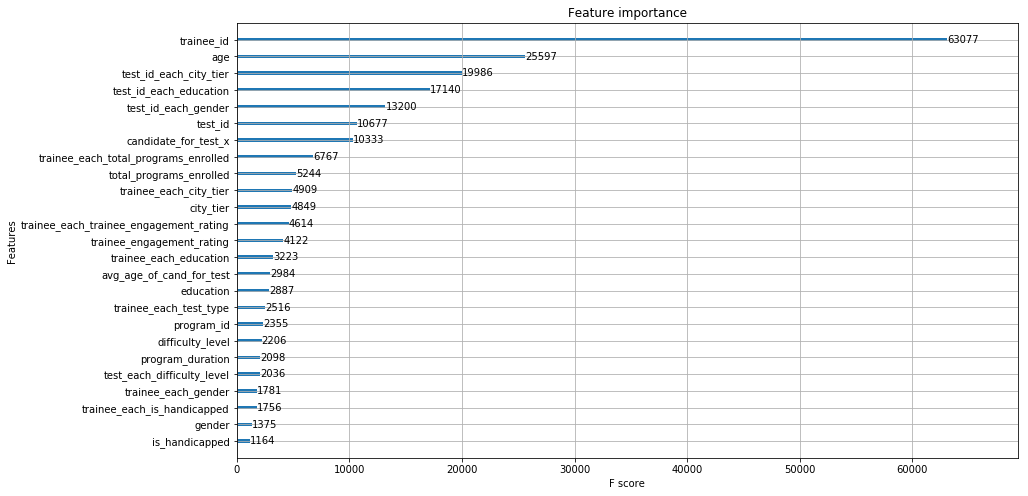

In [137]:
xgb.plot_importance(model)

## EDA

In [178]:
train_set

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,agebin,tot_prog_enrolled_bin,candidate_for_test_x,avg_age_of_cand_for_test_x,avg_rating_of_trainee_for_test_x,candidate_for_test,avg_age_of_cand_for_test_y,avg_rating_of_trainee_for_test_y,no_of_attempts
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0,0,1,664,35,4.0,664,35,4.0,3
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1,0,0,659,35,2.0,659,35,2.0,2
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1,2,0,168,37,1.0,168,37,1.0,3
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,35.0,4,N,1.0,1,1,0,494,36,1.0,494,36,1.0,4
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1,2,0,419,34,2.0,419,34,2.0,1
5,12531_23,T_3,T,134,23,offline,intermediate,12531,F,High School Diploma,1,29.0,4,N,2.0,0,1,0,591,37,1.0,591,37,1.0,5
6,17874_144,Y_2,Y,120,144,online,easy,17874,M,Bachelors,2,48.0,3,N,3.0,1,3,0,324,36,4.0,324,36,4.0,5
7,8129_61,U_1,U,134,61,online,easy,8129,M,Matriculation,2,45.0,1,N,1.0,1,3,0,786,36,2.0,786,36,2.0,2
8,5652_57,U_1,U,134,57,offline,easy,5652,M,Matriculation,4,39.0,3,N,3.0,1,2,0,605,35,2.0,605,35,2.0,7
9,17019_153,Y_1,Y,136,153,offline,hard,17019,M,Bachelors,3,28.0,2,N,4.0,1,1,0,454,36,4.0,454,36,4.0,7


In [5]:
def new_feat(df): 
    df['agebin'] = pd.cut(df['age'].astype(int),5)
#     df['agebin'] = pd.cut(df['age'].astype(int),5)
    df['tot_prog_enrolled_bin'] = pd.cut(df['total_programs_enrolled'].astype(int),4)
#     test_set['tot_prog_enrolled_bin'] = pd.cut(df['total_programs_enrolled'].astype(int),4)
    # print(train_set.agebin.unique(),train_set.tot_prog_enrolled_bin.unique())

    df = convert(df,['agebin','tot_prog_enrolled_bin'])
#     df = convert(df,['agebin','tot_prog_enrolled_bin'])

    df_temp = pd.DataFrame()
    df_temp['test_id'] = df.test_id.unique()
    df_temp['candidate_for_test'] =[len(df[df.test_id == i]) for i in df.test_id.unique()]
    df_temp['avg_age_of_cand_for_test'] = [int(np.mean(df[df.test_id == i].age)) for i in df.test_id.unique()]
    df_temp['avg_rating_of_trainee_for_test'] = [np.median(df[df.test_id == i].trainee_engagement_rating) 
                                                 for i in df.test_id.unique()]
    df =df.merge(df_temp, how = 'left', on = 'test_id')
    df_temp = pd.DataFrame()
    df_temp['trainee_id'] = df.trainee_id.unique()
    df_temp['no_of_attempts'] = [len(df[df.trainee_id == i].id) for i in df.trainee_id.unique()]

    df =df.merge(df_temp, how = 'left', on = 'trainee_id')
    
    return df


In [15]:
train = train_set.copy()
train_set= new_feat(train_set)
test_set = new_feat(test_set)

ValueError: Cannot convert non-finite values (NA or inf) to integer

### Visualization

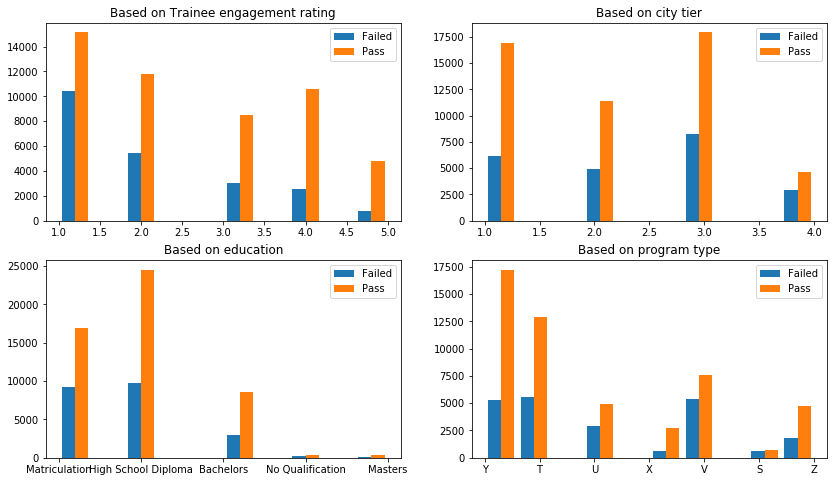

In [32]:
# fig, ax = plt.subplots(ncols = 3, nrows = 2)

# for i,j in zip(train_set.trainee_engagement_rating.unique(),product([0,1],[0,1,2])):
# #     print(i,j[0],j[1])
#     pd.value_counts(train_set[train_set.trainee_engagement_rating == i].is_pass).plot('bar', 
#                                                                                       ax = ax[j[0]][j[1]],
#                                                                                      title = f'Pass for Rating {i}',
#                                                                                      ylim = [0,16000])

plt.subplot(221)
plt.hist(x= [train_set[train_set.is_pass == 0]['trainee_engagement_rating'],train_set[train_set.is_pass == 1]['trainee_engagement_rating']],
        stacked = False, label = ['Failed','Pass'])
plt.title('Based on Trainee engagement rating')
plt.legend()

plt.subplot(222)
plt.hist(x = [train_set[train_set.is_pass == 0]['city_tier'],train_set[train_set.is_pass == 1]['city_tier']],
        label = ['Failed','Pass'])
plt.title('Based on city tier')
plt.legend()

plt.subplot(223)
plt.hist(x = [train_set[train_set.is_pass == 0]['education'],train_set[train_set.is_pass == 1]['education']],
        label = ['Failed','Pass'])
plt.title('Based on education')
plt.legend()

plt.subplot(224)
plt.hist(x = [train_set[train_set.is_pass == 0]['program_type'],train_set[train_set.is_pass == 1]['program_type']],
        label = ['Failed','Pass'])
plt.title('Based on program type')
plt.legend()

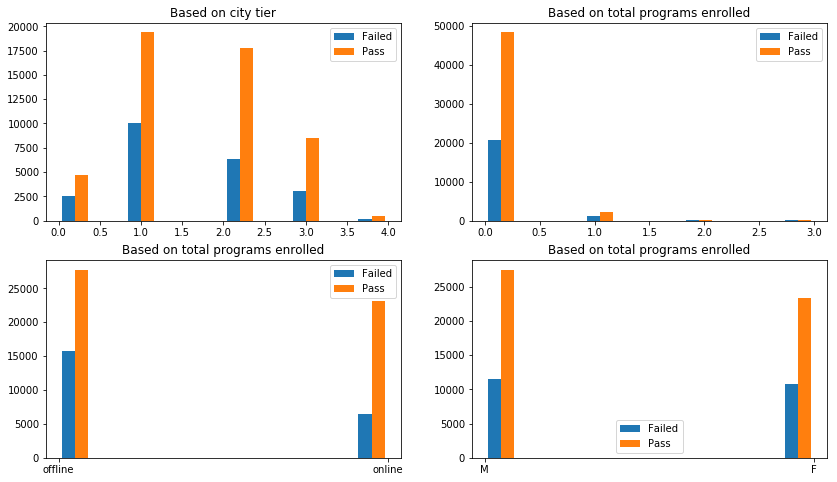

In [51]:
plt.subplot(221)
plt.hist(x = [train_set[train_set.is_pass == 0]['agebin'],train_set[train_set.is_pass == 1]['agebin']],
        label = ['Failed','Pass'])
plt.title('Based on city tier')
plt.legend()
plt.subplot(222)
plt.hist(x = [train_set[train_set.is_pass == 0]['tot_prog_enrolled_bin'],train_set[train_set.is_pass == 1]['tot_prog_enrolled_bin']],
        label = ['Failed','Pass'])
plt.title('Based on total programs enrolled')
plt.legend()
plt.subplot(223)
plt.hist(x = [train_set[train_set.is_pass == 0]['test_type'],train_set[train_set.is_pass == 1]['test_type']],
        label = ['Failed','Pass'])
plt.title('Based on total programs enrolled')
plt.legend()
plt.subplot(224)
plt.hist(x = [train_set[train_set.is_pass == 0]['gender'],train_set[train_set.is_pass == 1]['gender']],
        label = ['Failed','Pass'])
plt.title('Based on total programs enrolled')
plt.legend()

### Predictions

In [108]:
train_set = train_set.drop('candidate_for_test_y',1)

In [185]:
pd.Series(train_set.columns)
x_train,x_test, y_train,y_test = train_test_split(train_set.drop(['id','is_pass'],1),
                                                 train_set.is_pass, test_size = 0.1)

In [186]:
x_train.columns

Index(['program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'agebin', 'tot_prog_enrolled_bin',
       'candidate_for_test', 'avg_age_of_cand_for_test',
       'avg_rating_of_trainee_for_test', 'no_of_attempts'],
      dtype='object')

In [9]:
train_set = convert(train_set,['program_id', 'program_type',
       'test_type', 'difficulty_level', 'gender', 'education',
       'is_handicapped'])
test_set = convert(test_set,['program_id', 'program_type',
       'test_type', 'difficulty_level', 'gender', 'education',
       'is_handicapped'])

In [112]:
x_train.dtypes

program_id                          int64
program_type                        int64
program_duration                    int64
test_id                             int64
test_type                           int64
difficulty_level                    int64
trainee_id                          int64
gender                              int64
education                           int64
city_tier                           int64
age                               float64
total_programs_enrolled             int64
is_handicapped                      int64
trainee_engagement_rating         float64
agebin                              int64
tot_prog_enrolled_bin               int64
candidate_for_test_x                int64
avg_age_of_cand_for_test            int64
avg_rating_of_trainee_for_test    float64
dtype: object

In [196]:
ct = CatBoostClassifier(
    thread_count = 6,
    iterations = 500,
    learning_rate = 0.3,
    depth = 5,
    random_state = 42   
)


model = ct.fit(x_train,y_train)

y_preds = model.predict(x_test)
accuracy_score(y_test,y_preds)

0:	learn: 0.6260299	total: 44.7ms	remaining: 22.3s
1:	learn: 0.5947392	total: 84.8ms	remaining: 21.1s
2:	learn: 0.5781919	total: 129ms	remaining: 21.4s
3:	learn: 0.5691308	total: 171ms	remaining: 21.2s
4:	learn: 0.5641104	total: 218ms	remaining: 21.6s
5:	learn: 0.5602117	total: 261ms	remaining: 21.5s
6:	learn: 0.5568499	total: 296ms	remaining: 20.8s
7:	learn: 0.5538447	total: 333ms	remaining: 20.5s
8:	learn: 0.5521719	total: 371ms	remaining: 20.2s
9:	learn: 0.5506409	total: 414ms	remaining: 20.3s
10:	learn: 0.5493291	total: 457ms	remaining: 20.3s
11:	learn: 0.5484942	total: 507ms	remaining: 20.6s
12:	learn: 0.5459585	total: 557ms	remaining: 20.9s
13:	learn: 0.5451607	total: 604ms	remaining: 21s
14:	learn: 0.5440427	total: 646ms	remaining: 20.9s
15:	learn: 0.5430658	total: 689ms	remaining: 20.8s
16:	learn: 0.5421144	total: 731ms	remaining: 20.8s
17:	learn: 0.5410864	total: 772ms	remaining: 20.7s
18:	learn: 0.5406164	total: 815ms	remaining: 20.6s
19:	learn: 0.5392859	total: 861ms	remaini

165:	learn: 0.5049630	total: 7.13s	remaining: 14.3s
166:	learn: 0.5047821	total: 7.17s	remaining: 14.3s
167:	learn: 0.5046549	total: 7.21s	remaining: 14.3s
168:	learn: 0.5045288	total: 7.26s	remaining: 14.2s
169:	learn: 0.5043369	total: 7.32s	remaining: 14.2s
170:	learn: 0.5041784	total: 7.38s	remaining: 14.2s
171:	learn: 0.5040666	total: 7.44s	remaining: 14.2s
172:	learn: 0.5039183	total: 7.49s	remaining: 14.2s
173:	learn: 0.5037806	total: 7.54s	remaining: 14.1s
174:	learn: 0.5035462	total: 7.58s	remaining: 14.1s
175:	learn: 0.5034716	total: 7.63s	remaining: 14s
176:	learn: 0.5032898	total: 7.67s	remaining: 14s
177:	learn: 0.5032013	total: 7.72s	remaining: 14s
178:	learn: 0.5030715	total: 7.76s	remaining: 13.9s
179:	learn: 0.5029533	total: 7.8s	remaining: 13.9s
180:	learn: 0.5028162	total: 7.85s	remaining: 13.8s
181:	learn: 0.5027425	total: 7.89s	remaining: 13.8s
182:	learn: 0.5025733	total: 7.93s	remaining: 13.7s
183:	learn: 0.5023851	total: 7.97s	remaining: 13.7s
184:	learn: 0.50220

327:	learn: 0.4854493	total: 14.2s	remaining: 7.46s
328:	learn: 0.4853356	total: 14.3s	remaining: 7.42s
329:	learn: 0.4852665	total: 14.3s	remaining: 7.38s
330:	learn: 0.4851323	total: 14.4s	remaining: 7.33s
331:	learn: 0.4850804	total: 14.4s	remaining: 7.29s
332:	learn: 0.4850155	total: 14.4s	remaining: 7.24s
333:	learn: 0.4848879	total: 14.5s	remaining: 7.2s
334:	learn: 0.4848170	total: 14.5s	remaining: 7.16s
335:	learn: 0.4847167	total: 14.6s	remaining: 7.11s
336:	learn: 0.4846420	total: 14.6s	remaining: 7.07s
337:	learn: 0.4845844	total: 14.7s	remaining: 7.03s
338:	learn: 0.4845267	total: 14.7s	remaining: 6.98s
339:	learn: 0.4844032	total: 14.7s	remaining: 6.94s
340:	learn: 0.4843152	total: 14.8s	remaining: 6.89s
341:	learn: 0.4841462	total: 14.8s	remaining: 6.85s
342:	learn: 0.4840453	total: 14.9s	remaining: 6.81s
343:	learn: 0.4839671	total: 14.9s	remaining: 6.76s
344:	learn: 0.4838042	total: 15s	remaining: 6.72s
345:	learn: 0.4837592	total: 15s	remaining: 6.68s
346:	learn: 0.483

488:	learn: 0.4709868	total: 21.2s	remaining: 477ms
489:	learn: 0.4709180	total: 21.2s	remaining: 433ms
490:	learn: 0.4708756	total: 21.3s	remaining: 390ms
491:	learn: 0.4707665	total: 21.3s	remaining: 347ms
492:	learn: 0.4707201	total: 21.4s	remaining: 303ms
493:	learn: 0.4705947	total: 21.4s	remaining: 260ms
494:	learn: 0.4704373	total: 21.4s	remaining: 217ms
495:	learn: 0.4703350	total: 21.5s	remaining: 173ms
496:	learn: 0.4701973	total: 21.5s	remaining: 130ms
497:	learn: 0.4701259	total: 21.6s	remaining: 86.7ms
498:	learn: 0.4700284	total: 21.6s	remaining: 43.3ms
499:	learn: 0.4699620	total: 21.7s	remaining: 0us


0.7443547283426851

In [10]:
xg = xgb.XGBClassifier(max_depth= 5,n_estimators=1200,n_jobs= 6,learning_rate=0.5)


In [11]:
xg_model = xg.fit(train_set.drop(['id','is_pass'],1),train_set.is_pass,eval_metric='auc')

In [16]:
y_preds = xg_model.predict(test_set.drop('id',1))
# accuracy_score(y_test.values,y_preds)

ValueError: feature_names mismatch: ['program_id', 'program_type', 'program_duration', 'test_id', 'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education', 'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped', 'trainee_engagement_rating', 'agebin', 'tot_prog_enrolled_bin', 'candidate_for_test', 'avg_age_of_cand_for_test', 'avg_rating_of_trainee_for_test', 'no_of_attempts'] ['program_id', 'program_type', 'program_duration', 'test_id', 'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education', 'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped', 'trainee_engagement_rating']
expected no_of_attempts, avg_rating_of_trainee_for_test, candidate_for_test, avg_age_of_cand_for_test, agebin, tot_prog_enrolled_bin in input data

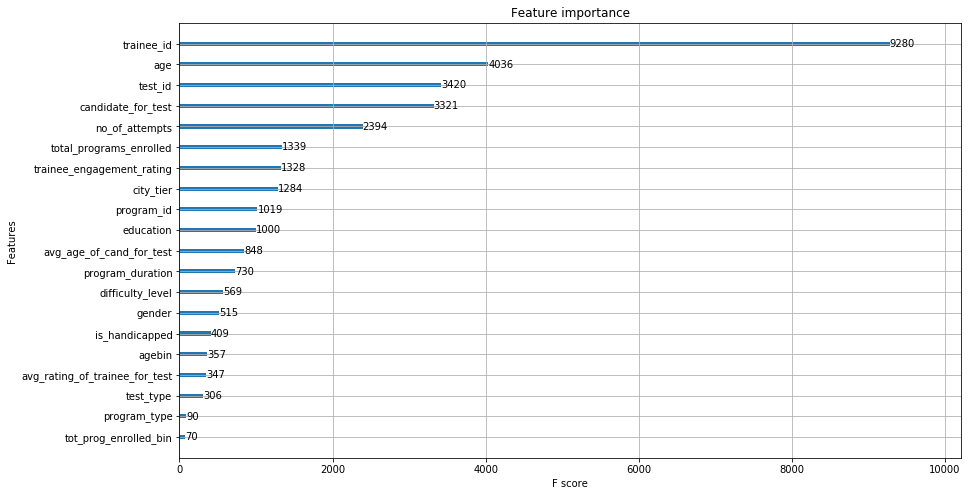

In [206]:
xgb.plot_importance(xg_model)

## Submission

In [215]:
y_pred = model.predict(test_convert)

In [ ]:
submission = pd.DataFrame()

submission['id'] = test_set.id
submission['is_pass'] = y_preds

In [ ]:
submission.to_csv('./submission_identity.csv',index= False)